# Homework1:Image Classification

檔名請按照命名格式:711xxxxxxx(您的學號)_hw1.ipynb

1.導入MNIST資料集並視覺化5個樣本和對應的Label（10分）

In [55]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras import layers, models
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay


(x_train, y_train), (x_test, y_test)  = mnist.load_data()


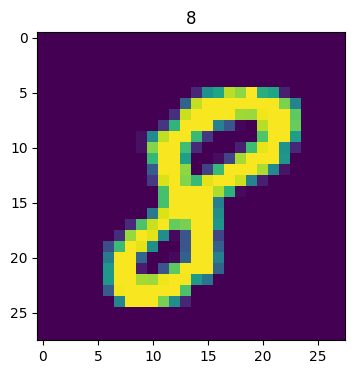

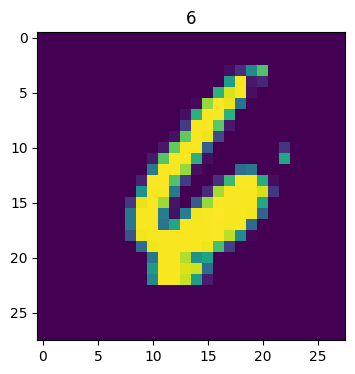

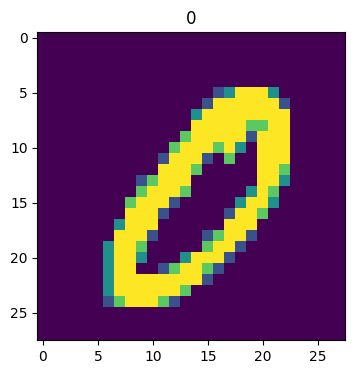

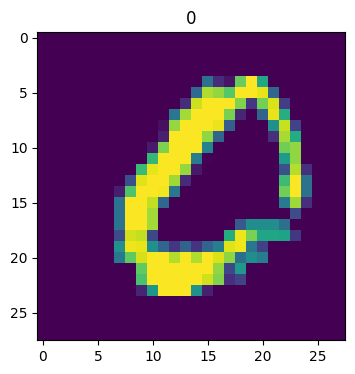

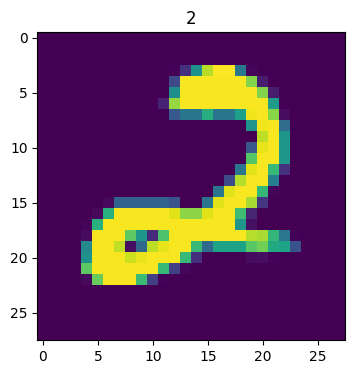

In [56]:
# 隨機視覺化5個樣本
import numpy as np
from matplotlib import pyplot as plt

def imshow(title, image = None, size = 5):
    if image.any():
      w, h = image.shape[0], image.shape[1]
      aspect_ratio = w/h
      plt.figure(figsize=(size * aspect_ratio,size))
      plt.imshow(image)
      plt.title(title)
      plt.show()
    else:
      print("Image not found")


for i in range(0,5):
    random_num = np.random.randint(0, len(x_train))
    img = x_train[random_num]
    imshow(y_train[random_num], img, size = 4)

2.資料預處理並把資料劃分成訓練集和測試集（10分）

將數據轉成一維且進行標準化:

In [57]:
# Store the number of rows and columns
img_rows = x_train[0].shape[0]
img_cols = x_train[0].shape[1]

# 將資料轉換為Kears可接受的形狀
#x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
#x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

# Store the shape of a single image
input_shape = (img_rows, img_cols)

# 將資料類別轉成 float32
x_train = x_train.astype('float32') #本來是uint8
x_test = x_test.astype('float32')

# Normalization: 將每個pixel的值從 (0~255) 轉成 (0~1)
x_train /= 255.0
x_test /= 255.0


將Label進行one-hot編碼:

In [58]:
from tensorflow.keras.utils import to_categorical

# One hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


印出訓練集與測試集的shape:

In [59]:
# 印出形狀
print("訓練集形狀:")
print("x_train:", x_train.shape)  # 訓練樣本
print("y_train:", y_train.shape)  # 訓練標籤

print("\n測試集形狀:")
print("x_test:", x_test.shape)   # 測試樣本
print("y_test:", y_test.shape)   # 測試標籤

訓練集形狀:
x_train: (60000, 28, 28)
y_train: (60000, 10)

測試集形狀:
x_test: (10000, 28, 28)
y_test: (10000, 10)


3.構建至少兩層隱藏層的ANN（10分）

建立神經網絡:

In [60]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.losses import CategoricalCrossentropy


model = Sequential([
              Flatten(input_shape=input_shape),
              Dense(128, activation='relu'),
              Dense(64, activation='relu'),
              Dense(10, activation='softmax')
])
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


印出模型的架構:

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

None


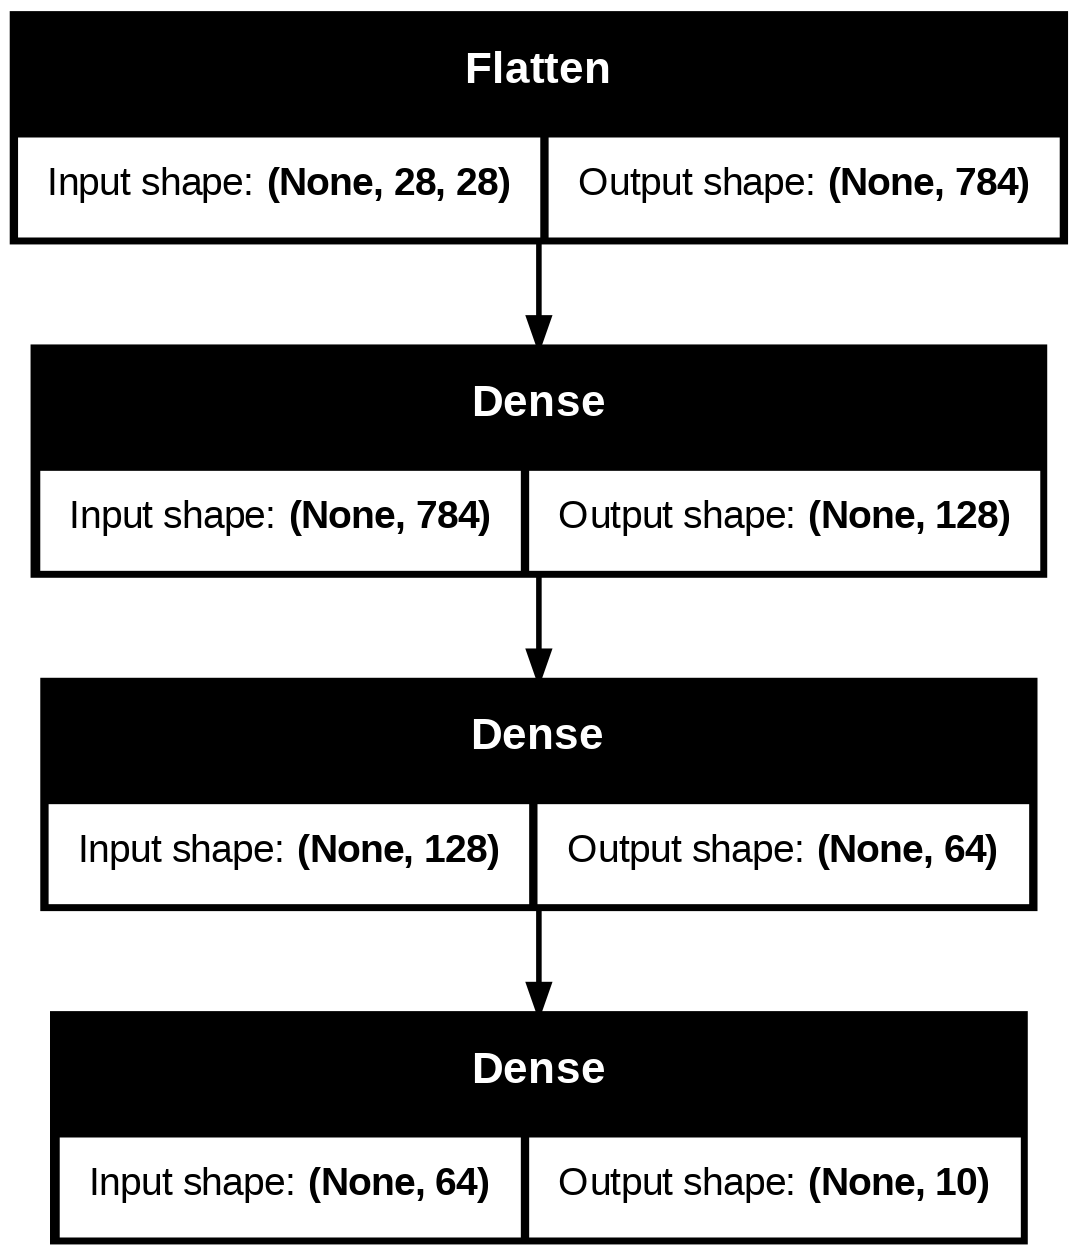

In [61]:
print(model.summary())
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=False)

4.完成訓練參數設置和訓練模型(10分）

設置optimizer、loss function、metrics、learning rate(若您選擇的optimizer有預設的learning rate則可以不用):

In [62]:
# 設置訓練參數
batch_size = 32
epochs = 10
learning_rate = 0.001

# 設置優化器、損失函數和評估指標
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
loss_function = 'categorical_crossentropy'
metrics = ['accuracy']


訓練模型:

In [63]:
history = model.fit(x_train,y_train,
           batch_size = batch_size,
           epochs = epochs,
           verbose = 1,
           validation_data = (x_test, y_test))

# 使用 evalute() 來評估模型
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8752 - loss: 0.4238 - val_accuracy: 0.9648 - val_loss: 0.1172
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9687 - loss: 0.1017 - val_accuracy: 0.9720 - val_loss: 0.0840
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9808 - loss: 0.0644 - val_accuracy: 0.9750 - val_loss: 0.0798
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9846 - loss: 0.0504 - val_accuracy: 0.9758 - val_loss: 0.0808
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9879 - loss: 0.0376 - val_accuracy: 0.9777 - val_loss: 0.0780
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9893 - loss: 0.0320 - val_accuracy: 0.9739 - val_loss: 0.0951
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9914 - loss: 0.0257 - val_accuracy: 0.9776 - val_loss: 0.0895
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9933 - loss: 0.0195

5.訓練模型並視覺化訓練曲線證明Loss隨著訓練的逐漸下降（20分）

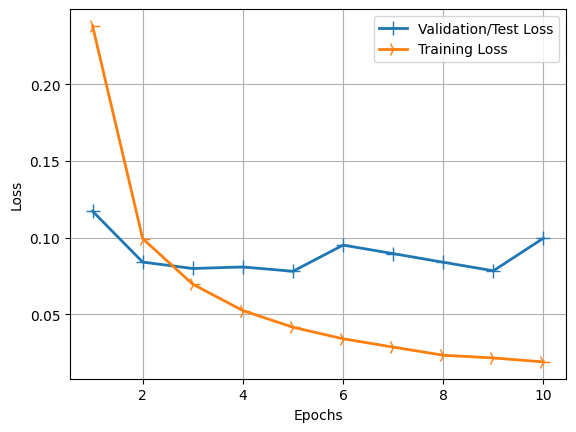

In [64]:
# 獲取訓練記錄
history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

# 準備圖表中的x軸
epochs = range(1, len(loss_values) + 1)

# 製作loss圖表
line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

6.印出模型在測試集上的表現,accuracy需達到90%以上（20分）

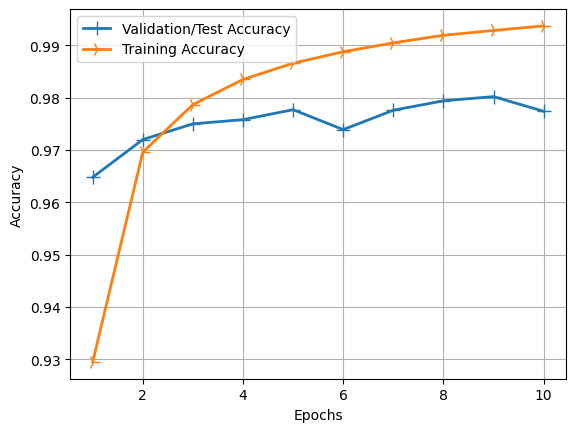

模型在測試集上的準確率達到 90% 以上！


In [65]:
# 製作accuracy圖表
import matplotlib.pyplot as plt

history_dict = history.history

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_acc_values, label='Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label='Training Accuracy')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

# 檢查準確率是否達到 90%
if score[1] >= 0.90:
    print("模型在測試集上的準確率達到 90% 以上！")
else:
    print("模型在測試集上的準確率未達到 90%。")

7.顯示出模型預測測試集的Confusion Matrix、Precision、Recall、Accuracy（10分）

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


<Figure size 1000x800 with 0 Axes>

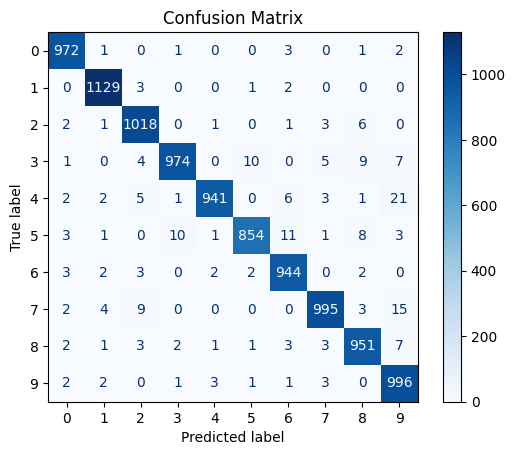

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.99      0.98      1032
           3       0.98      0.96      0.97      1010
           4       0.99      0.96      0.97       982
           5       0.98      0.96      0.97       892
           6       0.97      0.99      0.98       958
           7       0.98      0.97      0.98      1028
           8       0.97      0.98      0.97       974
           9       0.95      0.99      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

Accuracy: 0.9774


In [66]:
# 預測測試集
y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

# 計算混淆矩陣
cm = confusion_matrix(y_test_labels, y_pred)

# 顯示混淆矩陣
plt.figure(figsize=(10, 8))
ConfusionMatrixDisplay(cm).plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# 計算精確率、召回率和準確率
report = classification_report(y_test_labels, y_pred, target_names=[str(i) for i in range(10)])
print("Classification Report:")
print(report)

# 準確率
accuracy = np.mean(y_test_labels == y_pred)
print(f'Accuracy: {accuracy:.4f}')

8.視覺化3個模型預測錯誤的資料（10分）

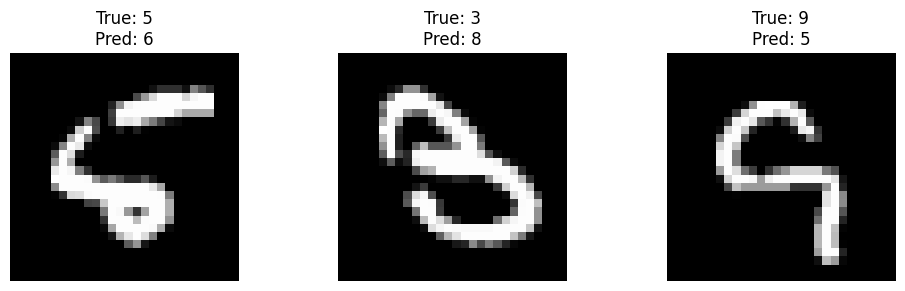

In [67]:
# 找到預測錯誤的樣本
wrong_predictions = np.where(y_pred != y_test_labels)[0]

num_wrong = min(3, len(wrong_predictions))
plt.figure(figsize=(10, 3))

for i in range(num_wrong):
    idx = wrong_predictions[i]
    plt.subplot(1, num_wrong, i + 1)
    plt.imshow(x_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f'True: {y_test_labels[idx]}\nPred: {y_pred[idx]}')
    plt.axis('off')

plt.tight_layout()
plt.show()